In [14]:
import pandas as pd
import numpy as np
from dateutil.relativedelta import relativedelta
from datetime import datetime
from dateutil.parser import parse
import pickle
from Module.Preprocessing import *
import matplotlib.pyplot as plt
import seaborn as sns

* 그림그리는 것도 함수화할지는 고민, 1회성들이 많음

# 한글 깨짐 폰트설정

In [59]:
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

# 일단 읽고 종속변수만 변수로 받기

In [2]:
X_train_After_IPO_1 = pd.read_csv('CleanData/X_train_After_IPO_1.csv',encoding = 'cp949', thousands=',')
X_train_After_IPO_3 = pd.read_csv('CleanData/X_train_After_IPO_3.csv',encoding = 'cp949', thousands=',')
X_train_Before_IPO = pd.read_csv('CleanData/X_train_Before_IPO.csv',encoding = 'cp949', thousands=',')
X_train_After_IPO_1.set_index('종목명',inplace = True)
X_train_After_IPO_3.set_index('종목명',inplace = True)
X_train_Before_IPO.set_index('종목명',inplace = True)

In [78]:
IPO_1 = X_train_Before_IPO['공모가 대비 1개월 수익률']
IPO_3 = X_train_Before_IPO['공모가 대비 3개월 수익률']
IPO_6 = X_train_Before_IPO['공모가 대비 6개월 수익률']
After_1 = X_train_After_IPO_1['1_3_수익률']
After_3 = X_train_After_IPO_3['3_6_수익률']
Y_values = [IPO_1, IPO_3, IPO_6, After_1, After_3]

<AxesSubplot:xlabel='종목명'>

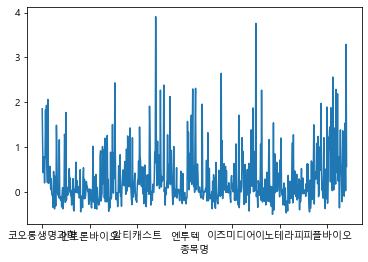

In [76]:
IPO_1.plot()

# 가공전 수익률에서 기초 통계

In [68]:
Y_value_df = pd.DataFrame(Y_values).T
Y_value_df.describe()

,공모가 대비 1개월 수익률,공모가 대비 3개월 수익률,공모가 대비 6개월 수익률,1_3_수익률,3_6_수익률
count,642.000000,642.000000,642.000000,642.000000,642.000000
mean,0.281637,0.276699,0.299749,0.022176,0.026176
std,0.610579,0.624214,0.772201,0.286267,0.321598
min,-0.505000,-0.703500,-0.712333,-0.712676,-0.658576
25%,-0.106401,-0.123077,-0.171267,-0.142265,-0.142682
50%,0.083750,0.100926,0.082292,-0.007529,-0.023365
75%,0.478877,0.493078,0.560714,0.124848,0.118581
max,3.908333,4.520000,5.700000,2.219355,3.278146


# 가공전 수익률 분포

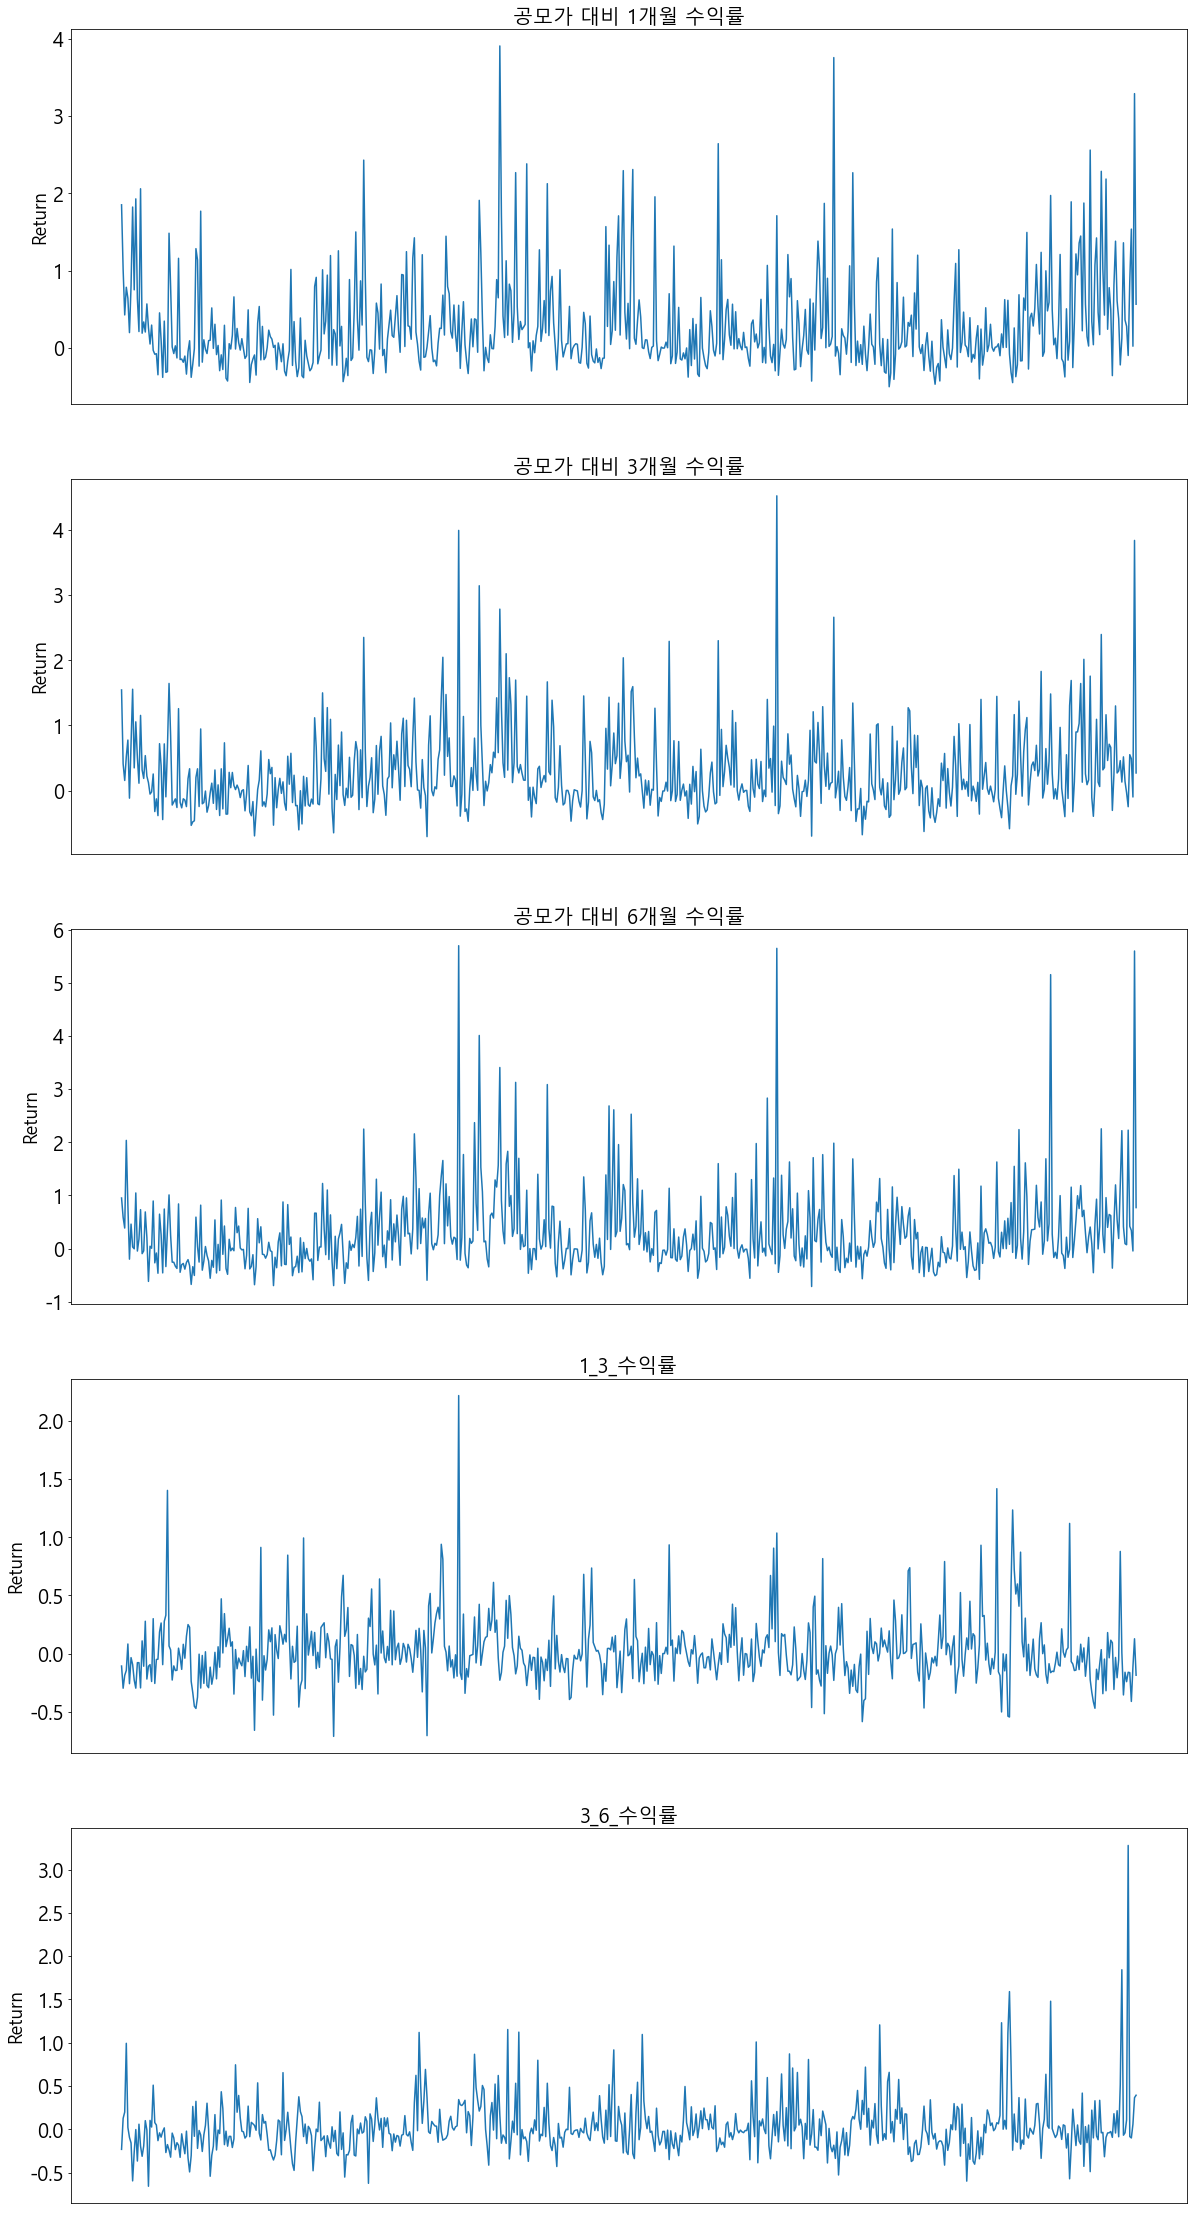

In [85]:
plt.figure(figsize=(20,40))
k = 0  # enum
for i in Y_values:
    k += 1    
    plot = len_list*100+10+k
    plt.subplot(plot)
    plt.plot(i)
    plt.title(i.name, fontsize=20)
    plt.ylabel('Return', fontsize=18)
    plt.yticks(fontsize=20)
    plt.gca().set_xticks([])
    plt.xticks([])


plt.show()

# Cut 설정 - 이 아래는 반복작업이여서 그냥 반복문으로 처리할 걸 그랬음

In [4]:
Short_Cut = [-0.2, -0.1, 0.1, 0.2]
Long_Cut = [-0.4, -0.2, 0.2, 0.4]

In [71]:
IPO_1_Cut = Cut(IPO_1,Short_Cut)
IPO_3_Cut = Cut(IPO_3,Short_Cut)
IPO_6_Cut = Cut(IPO_6,Long_Cut)
After_1_Cut = Cut(After_1,Short_Cut)
After_3_Cut = Cut(After_3,Long_Cut)
Y_values_Cut = [IPO_1_Cut,IPO_3_Cut,IPO_6_Cut,After_1_Cut,After_3_Cut]

# Cut 이후 통계

In [72]:
Y_values_Cut_nums = [ i.value_counts().sort_index() for i in Y_values_Cut]

1     91
2     76
3    166
4     50
5    259
Name: 공모가 대비 1개월 수익률, dtype: int64
1    115
2     59
3    147
4     52
5    269
Name: 공모가 대비 3개월 수익률, dtype: int64
1     47
2     93
3    233
4     72
5    197
Name: 공모가 대비 6개월 수익률, dtype: int64
1    105
2    100
3    258
4     72
5    107
Name: 1_3_수익률, dtype: int64
1     18
2     91
3    417
4     63
5     53
Name: 3_6_수익률, dtype: int64


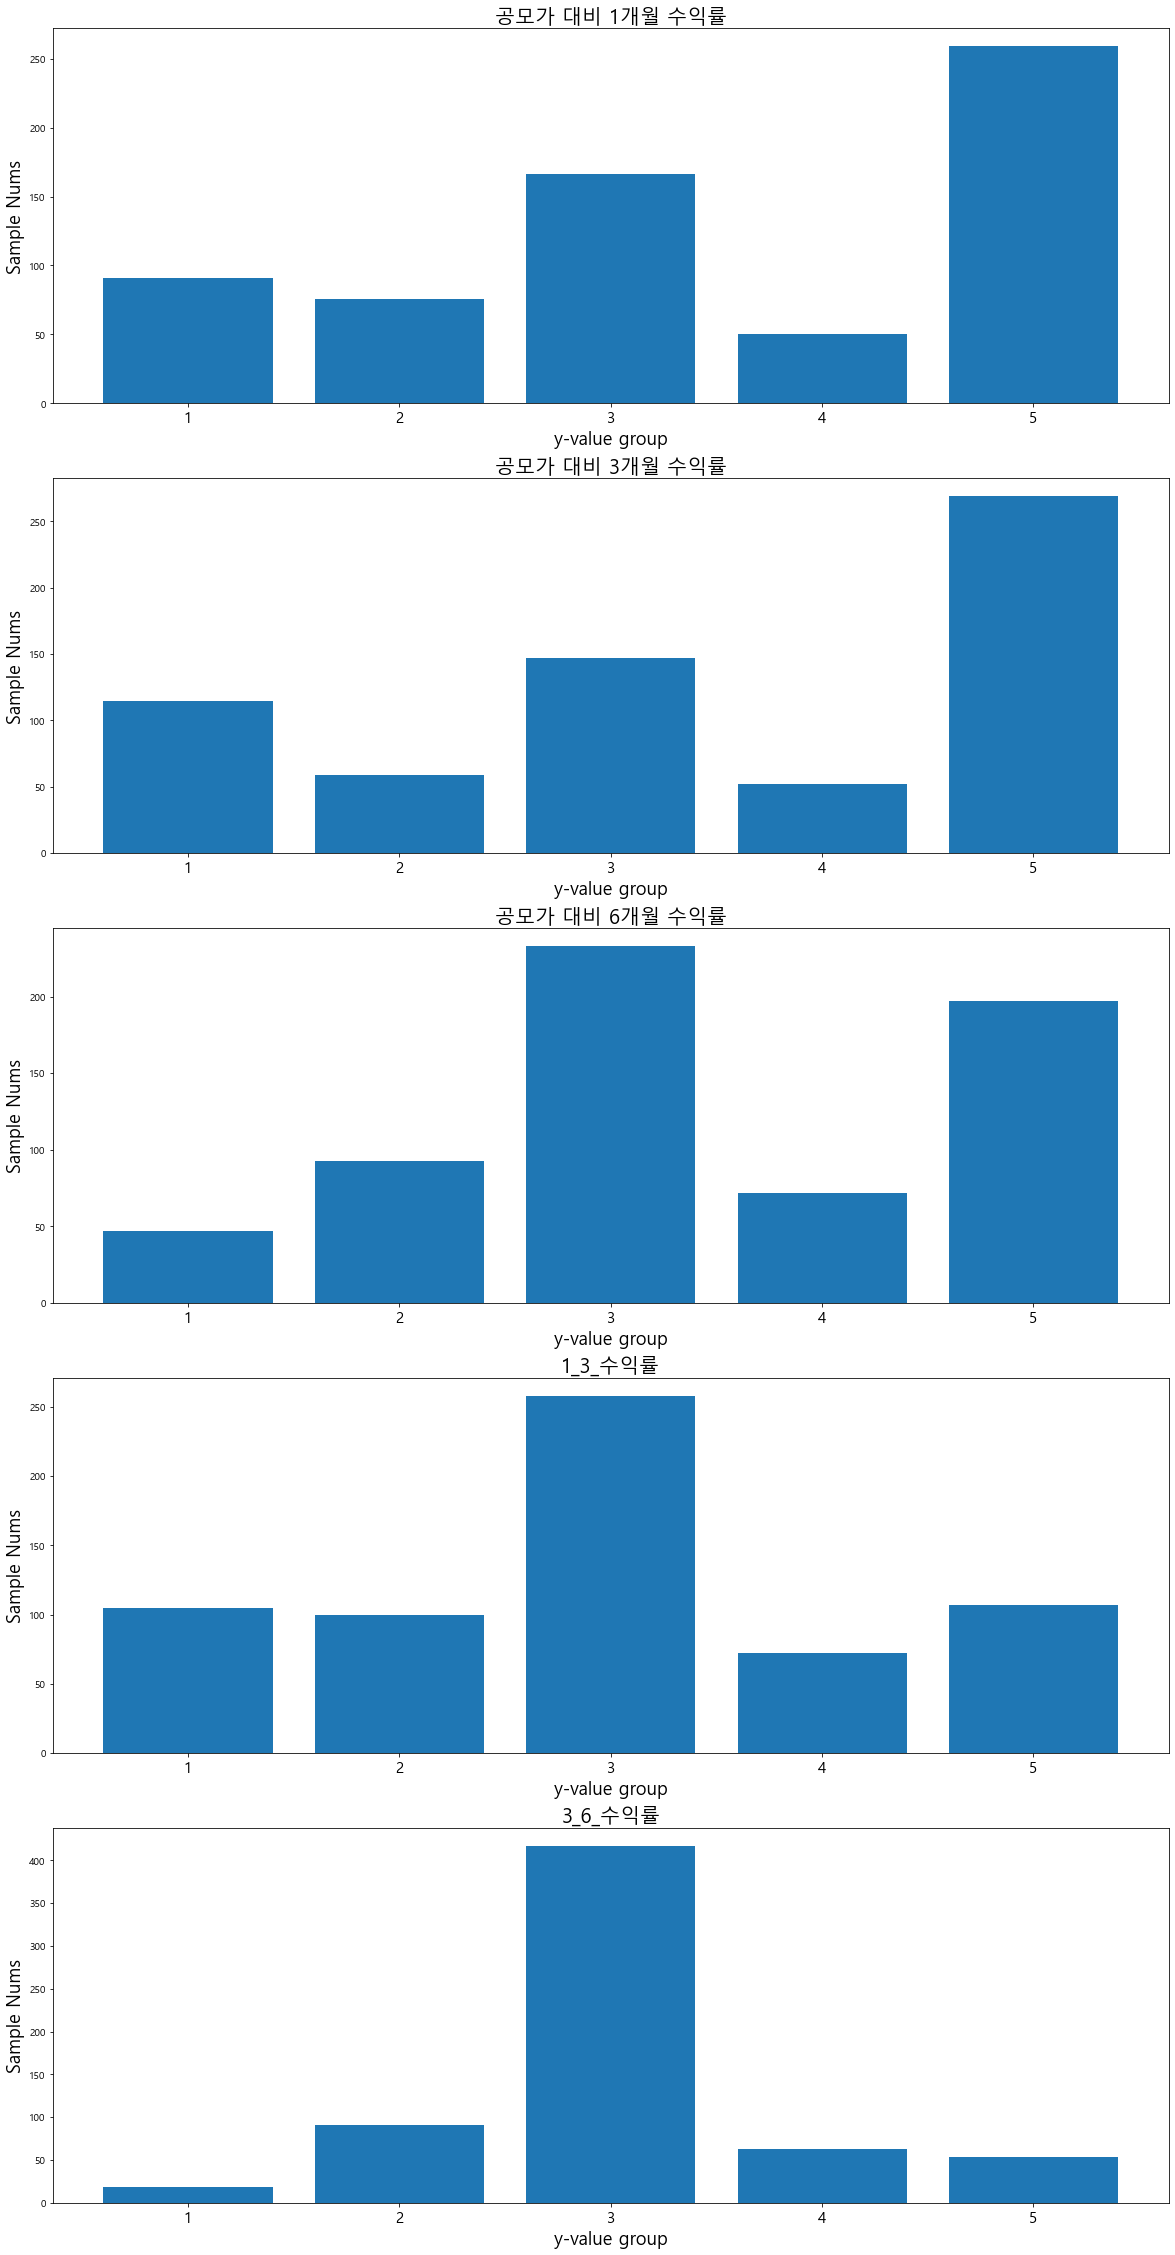

In [73]:
len_list = len(Y_values_Cut_nums)
index = range(1, len(Y_values_Cut_nums[0])+1 ) # 이거는 필요에 따라 loop안에서 돌필요도 있을 것 같음
plt.figure(figsize=(20,40))
k = 0
for i in Y_values_Cut_nums:
    k += 1    
    plot = len_list*100+10+k
    plt.subplot(plot)
    plt.bar(index,i)
    plt.title(i.name, fontsize=20)
    plt.ylabel('Sample Nums', fontsize=18)
    plt.xlabel('y-value group', fontsize=18)
    plt.xticks(fontsize=15)
    print(i)


plt.show()